# Evaluation of Using Principal Component Analysis with Various Classification Models: Breast Cancer Diagnosis

Author: James A. Nguyen - janguye5@uci.edu

## Introduction - Examining the Method:

Principal Component Analysis (PCA) advertises the use of dimension reduction to simplify and accelerate training with less computation. The method tackles the "curse of dimensionality" that often limits data analysis due to consequent memory and hardware constraints. Furthermore, relative to the size of the data, a large number of parameters can be troublesome for other reasons: overly complex models can make models more prone to overfitting. PCA creates new vectors from relationships in the existing data to isolate the most significant relationships by measuring for vectors along which the data's projections have the highest variance. It is common practice to find the number of new parameters that account for the greater majority of the variance in the data and drop the remaining ones to simplify the model. This process solves redundancy in the set of original parameters whilst reducing training complexity and making the data easier to visualize.

## Goal - Compare Model Performance with and without PCA:

One property I wish to explore, throughout this analysis, is the effect of PCA on the performance of the model. It will be interesting to see how PCA might positively or negatively affect the process of data analysis outside of data preprocessing for model simplification. If negative, it opens up the conversation as to what level of accuracy are we willing to sacrifice for ease of complexity. If positive, it would be important to test this analysis on different datasets to observe for which types of problems is PCA most suited. Regardless of the effect of PCA on the accuracy of the model, testing for the number of parameters to keep versus drop from the model will also serve to be valuable for future application of the method.

## Tutorial - Source:

For this analysis, I will be building off of a tutorial that demonstrates the implementation of PCA on the breast cancer dataset.

https://www.datacamp.com/tutorial/principal-component-analysis-in-python

Author: Aditya Sharma

## The Dataset:

In [ ]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.datasets import load_breast_cancer

In [ ]:
breast = load_breast_cancer()

breast_data = breast.data
print("Data Shape: ", breast_data.shape)

breast_labels = breast.target
print("Labels Shape: ", breast_labels.shape)
labels = np.reshape(breast_labels, (569,1))

Data Shape:  (569, 30)
Labels Shape:  (569,)


In [ ]:
final_breast_data = np.concatenate([breast_data,labels],axis = 1)
df = pd.DataFrame(final_breast_data)
features = breast.feature_names
features_labels = np.append(features,'label')
df.columns = features_labels
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


In [ ]:
# Reassign 0,1 labels to 'benign' and 'malignant'
df['label'].replace(0, 'Benign',inplace=True)
df['label'].replace(1, 'Malignant',inplace=True)

We can use the StandardScaler to standardize the data within each column to a normal distribution with mean = 0, and variance = 1. This can also be done with Numpy.

In [ ]:
from sklearn.preprocessing import StandardScaler
x = df.loc[:, features].values
x = StandardScaler().fit_transform(x)
np.mean(x),np.std(x)

(-6.826538293184326e-17, 1.0)

In [ ]:
feat_cols = ['feature'+str(i) for i in range(x.shape[1])]
df_norm = pd.DataFrame(x,columns=feat_cols)
df_norm.sample(5)

,feature0,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,...,feature20,feature21,feature22,feature23,feature24,feature25,feature26,feature27,feature28,feature29
359,-1.332393,-0.225644,-1.324225,-1.070205,0.323071,-0.848666,-0.774633,-0.899156,-1.115796,0.962892,...,-0.879933,-0.107025,-0.937396,-0.775210,0.040829,-0.950170,-0.756994,-0.975815,-0.722753,-0.143295
116,-1.470424,-0.821373,-1.368711,-1.165198,-0.123848,0.378253,0.048094,-0.666494,-1.849636,1.252083,...,-1.419590,-1.401633,-1.308230,-1.073352,-0.634244,-0.422174,-0.565093,-1.159448,-2.020213,-0.372717
506,-0.541698,0.174612,-0.514838,-0.573909,0.942210,0.205794,-0.088504,-0.703122,1.140487,0.870748,...,-0.643859,-0.245442,-0.659197,-0.642136,0.343297,-0.144817,0.390094,-0.513536,-0.310219,0.246278
442,-0.098636,-0.814392,-0.148245,-0.196212,-0.582865,-0.704256,-0.982418,-1.005505,-1.484542,-0.612066,...,-0.206915,-1.331610,-0.278832,-0.305847,-1.103288,-0.936175,-1.137102,-1.240758,-1.685332,-0.878109
150,-0.320167,0.346815,-0.348429,-0.385345,1.219756,-0.539188,-0.721149,-0.579569,2.659279,-0.273259,...,-0.436776,-0.255213,-0.489715,-0.463884,-0.116980,-0.914547,-0.916656,-0.786396,0.477640,-1.085918


## PCA Transformation:

We will create a separate copy of the dataset on which we will apply PCA. For now, we will only use the two principal components with the highest variance. We will expand upon this adaptively later.

In [ ]:
from sklearn.decomposition import PCA
breast_pca = PCA(n_components=2)
principalComponents_breast = breast_pca.fit_transform(x)

In [ ]:
df_pca = pd.DataFrame(data = principalComponents_breast
             , columns = ['principal component 1', 'principal component 2'])
df_pca.sample(5)

,principal component 1,principal component 2
300,6.590236,-1.484862
421,1.988462,2.316048
372,3.635015,-1.956441
122,12.894612,2.316622
230,3.257255,-0.125200


In [ ]:
print('Explained variation per principal component: {}'.format(breast_pca.explained_variance_ratio_))

Explained variation per principal component: [0.44272026 0.18971182]


With there only being 2 principal components, instead of the original 30 labels, we can more easily plot the data to visualize trends in the data. As per the output of the above print statement, though, these principal components sum to account for around 63% of all of the variance in the data.

<Figure size 640x480 with 0 Axes>

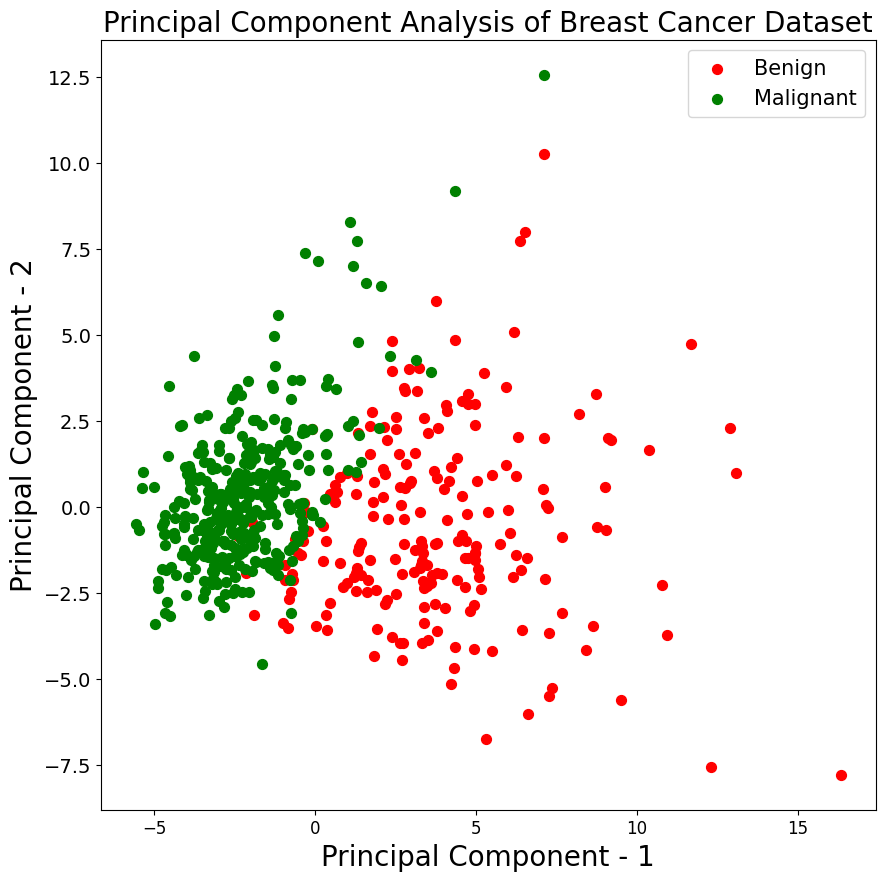

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure()
plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Principal Component - 1',fontsize=20)
plt.ylabel('Principal Component - 2',fontsize=20)
plt.title("Principal Component Analysis of Breast Cancer Dataset",fontsize=20)
targets = ['Benign', 'Malignant']
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = df['label'] == target
    plt.scatter(df_pca.loc[indicesToKeep, 'principal component 1']
               , df_pca.loc[indicesToKeep, 'principal component 2'], c = color, s = 50)

plt.legend(targets,prop={'size': 15});

# ** Tutorial Instruction Ends Here **

### Choosing 'n' Components:

The entire process can be defined as the function below.

In [ ]:
def PCA_transform(normalized_array, n_components):
    pca = PCA(n_components=n_components)
    principalComponents = pca.fit_transform(normalized_array)
    columns = []
    df_pca = pd.DataFrame(data = principalComponents
                , columns = range(1,n_components+1))
    variation = pca.explained_variance_ratio_
    return df_pca, variation

With this, we can recreate a dataframe with more PCA components for which we can decide which aren't necessary.

In [ ]:
df2_pca, df2_var = PCA_transform(normalized_array = x, n_components = 15)
df2_var

array([0.44272026, 0.18971182, 0.09393163, 0.06602135, 0.05495768,
       0.04024522, 0.02250734, 0.01588724, 0.01389649, 0.01168978,
       0.00979719, 0.00870538, 0.00804525, 0.00523366, 0.00313783])

We now have the explained variance for 15 principal components. From this, we choose which components to use in several ways.
1). We can visually analyze the explained variance and decide which components are unnecessary.
2). We can use a simple algorithm to take the 'n' components that explain at least XX% of the data.
3). We can use a simple algorithm that finds the index of the minimum principal component that individually explains less than XX% of the data.

For now, we will skip 1)., and we will explore the other two methods.

In [ ]:
def find_n_components(explained_variation, XX):
    cumulative_variation = 0
    for i, variation in enumerate(explained_variation):
        cumulative_variation += variation
        if cumulative_variation >= XX:
            return i + 1
    return len(explained_variation)
    
def find_min_component_index(explained_variation, XX):
    for i, variation in enumerate(explained_variation):
        if variation < XX:
            return i
    return -1

Let's use the find_n_components function to find which 'n' components explain 90% of the variation in the data

In [ ]:
find_n_components(explained_variation = df2_var, XX = 0.9)

7

Now, let's use the find_min_component_index function to find the minimum index that individually accounts for at least 5% of the variation of the data.

In [ ]:
find_min_component_index(explained_variation = df2_var, XX = 0.05)

5

### Analysis of 'n' Optimization:

While both methods are effective at selecting a suitable 'n' for the task at hand, I personally think that the find_min_component_index function would be more useful. This is because it is very possible that, while searching for 'n' components that explain 90% of the explained variance, there could be hundreds of principal components that explain the 1% of data that separate 89% and 90% of the explained variance in more extreme scenarios that involve exponentially decreasing variance in higher component indices. With the find_min_component_index, we can simply isolate the most individually significant principal components from very insignificant ones.

# Comparison of Model Accuracy on Original and PCA Datasets

The remaining exploration of this project will involve using classic classification models to compare their performance before and after applying PCA for vectors explaining at least 5% of the variation.

### Initialize Train-Test Split

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import time

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:, :-1],df.iloc[:, -1], test_size=0.1, random_state=913)

df_pca, df_var = PCA_transform(normalized_array = x, n_components = 15)
n = find_min_component_index(explained_variation = df_var, XX = 0.05)
df_pca = df_pca.iloc[:,:n]
df_pca['labels'] = labels
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(df_pca.iloc[:, :-1],df_pca.iloc[:, -1], test_size=0.1, random_state=913)

## Logistic Regression:

In [ ]:
clf_pre = LogisticRegression(max_iter=10000)
start_time = time.time()
clf_pre.fit(X_train,y_train)
training_time_pre = time.time() - start_time
print(f"Logistic Regression Base Training time: {training_time_pre:.4f} seconds")
accuracy_pre = clf_pre.score(X_test, y_test)
print(f"Logistic Regression Base Accuracy on test set: {accuracy_pre:.4f}")

Logistic Regression Base Training time: 10.6431 seconds
Logistic Regression Base Accuracy on test set: 0.9825


In [ ]:
clf_post = LogisticRegression(max_iter=10000)

start_time = time.time()
clf_post.fit(X_train_pca,y_train_pca)
training_time_post = time.time() - start_time
print(f"Logistic Regression w/ PCA Training time: {training_time_post:.4f} seconds")
accuracy_post = clf_post.score(X_test_pca, y_test_pca)
print(f"Logistic Regression w/ PCA Accuracy on test set: {accuracy_post:.4f}")

Logistic Regression w/ PCA Training time: 0.0061 seconds
Logistic Regression w/ PCA Accuracy on test set: 0.9649


In [ ]:
print("Training Time Acceleration: ", training_time_pre/training_time_post)
print("Accuracy Reduction: ", accuracy_post/accuracy_pre)

Training Time Acceleration:  1741.9928588152657
Accuracy Reduction:  0.9821428571428572


### Logistic Regression w/ PCA Analysis:

Astonishingly, the training time of the PCA-applied model was more than 1741 times faster than the original model. Furthermore, the model maintained 98.2% of the accuracy obtained by the model with all parameters.

In [ ]:
df_pca, df_var = PCA_transform(normalized_array = x, n_components = 15)
n = find_n_components(explained_variation = df2_var, XX = 0.9)
df_pca = df_pca.iloc[:,:n]
df_pca['labels'] = labels
X_train_pca2, X_test_pca2, y_train_pca2, y_test_pca2 = train_test_split(df_pca.iloc[:, :-1],df_pca.iloc[:, -1], test_size=0.1, random_state=913)
clf_post = LogisticRegression(max_iter=10000)

start_time = time.time()
clf_post.fit(X_train_pca,y_train_pca)
training_time = time.time() - start_time
print(f"Base Training time: {training_time:.4f} seconds")
accuracy = clf_post.score(X_test_pca, y_test_pca)
print(f"Base Accuracy on test set: {accuracy:.4f}")

Base Training time: 0.0787 seconds
Base Accuracy on test set: 0.9649


Out of curiosity, I also tried the model containing the 'n' components that explained 90% of the variance, and there did not seem to be any difference in the model accuracy.

## Linear Discriminant Analysis

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [ ]:
lda_pre = LinearDiscriminantAnalysis()
start_time_lda_pre = time.time()
lda_pre.fit(X_train,y_train)
training_time_lda_pre = time.time() - start_time_lda_pre
print(f"LDA Base Training time: {training_time_lda_pre:.4f} seconds")
accuracy_lda_pre = lda_pre.score(X_test, y_test)
print(f"LDA Base Accuracy on test set: {accuracy_lda_pre:.4f}")

LDA Base Training time: 0.0889 seconds
LDA Base Accuracy on test set: 0.9825


In [ ]:
lda_post = LinearDiscriminantAnalysis()
start_time_lda_post = time.time()
lda_pre.fit(X_train_pca,y_train_pca)
training_time_lda_post = time.time() - start_time_lda_post
print(f"LDA w/ PCA Training time: {training_time_lda_post:.4f} seconds")
accuracy_lda_post = lda_pre.score(X_test_pca, y_test_pca)
print(f"LDA w/ PCA Accuracy on test set: {accuracy_lda_post:.4f}")

LDA w/ PCA Training time: 0.0060 seconds
LDA w/ PCA Accuracy on test set: 0.9474


In [ ]:
print("Training Time Acceleration: ", training_time_lda_pre/training_time_lda_post)
print("Accuracy Reduction: ", accuracy_lda_post/accuracy_lda_pre)

Training Time Acceleration:  14.765821782178218
Accuracy Reduction:  0.9642857142857143


### Linear Discriminant Analysis w/ PCA Results:

Again, we see that the model maintained a most of the accuracy of the original dataset. This time we do see that while Linear Discriminant Analysis (LDA) improves the speed of training by over 14 times, it is far less than with logistic regression. I believe that this reduction in effectiveness between the two models may be attributed to the dimension reduction properties that describe LDA, itself. However, these results are still very impressive.

# Conclusion:

Although applying Principal Component Analysis on classification models can slightly reduce the accuracy, if the slight drop in accuracy is tolerable within the scope of the problem at hand, the amount of time saved by training could very well be worth the application. 
This analysis, though, only takes into consideration one dataset and classification problem. Future expansions of this project would explore the use of PCA on higher dimensional data, such as image data. I hypothesis that, although this demonstration exposed a drop in accuracy, some examples may see an increase in model accuracy as the dimension reduction could eliminate the influence of insignificant predictors that may cause the model to overfit.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=b76646fb-a5ae-4367-9afa-97cc1f30c3d1' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>